In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src.signals.fundamental.dataset_features import build_multiticker_fundamental_dataset, create_benchmark_cumulative_returns
from src.signals.fundamental.train_model import predict_linear_quarter_returns, predict_ridge_quarter_returns,predict_lasso_quarter_returns
from src.utils.plots import plot_grid_predictions_by_ticker, plot_cumulative_returns, plot_sum_cumulative_returns, plot_prediction_scatter

### 1. Evaluate Models on fundamental predictions on Basket Stocks 

Benchmark

In [26]:
TICKERS = [
    "AIR.PA",     # Airbus
    "LDO.MI",     # Leonardo
    "BA",         # Boeing
    "RTX",        # RTX Corporation
    "LMT",        # Lockheed Martin
    "NOC",        # Northrop Grumman
    "GD",         # General Dynamics
    "TXT",        # Textron
    "HWM",        # Howmet Aerospace
    "SPR",        # Spirit AeroSystems
    "HEI",        # HEICO Corp
    "TDG",        # TransDigm Group
    "CAE.TO",     # CAE Inc.
    "ERJ",        # Embraer
    "AVAV"        # AeroVironment
]

benchmark = create_benchmark_cumulative_returns(TICKERS, '2023-05-01', '2025-05-01')

[*********************100%***********************]  15 of 15 completed


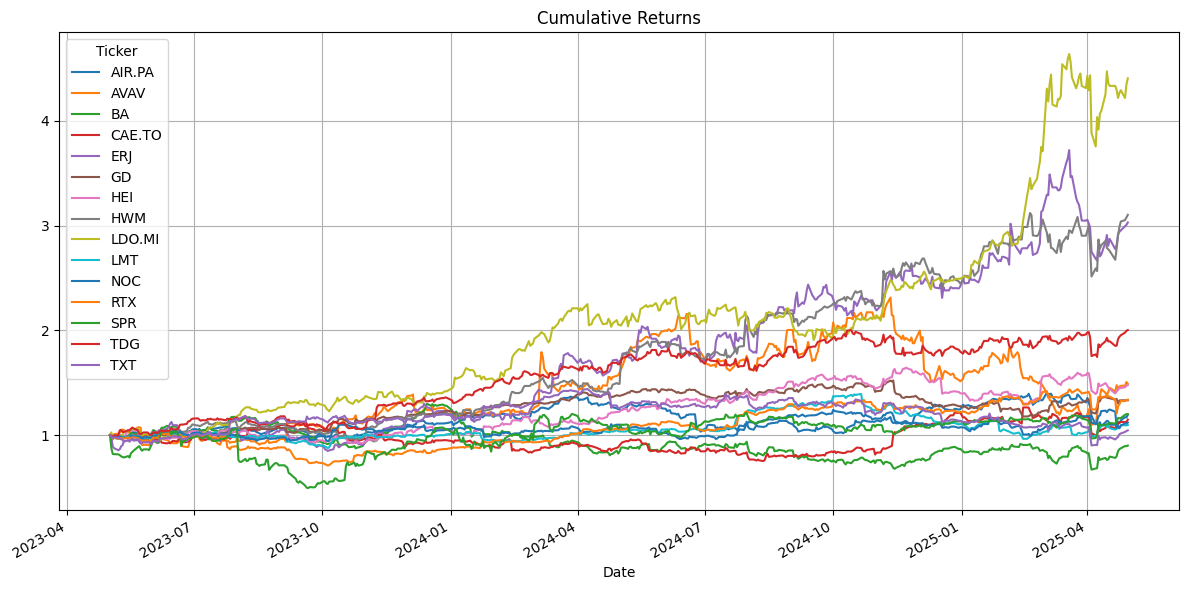

In [3]:
plot_cumulative_returns(benchmark)

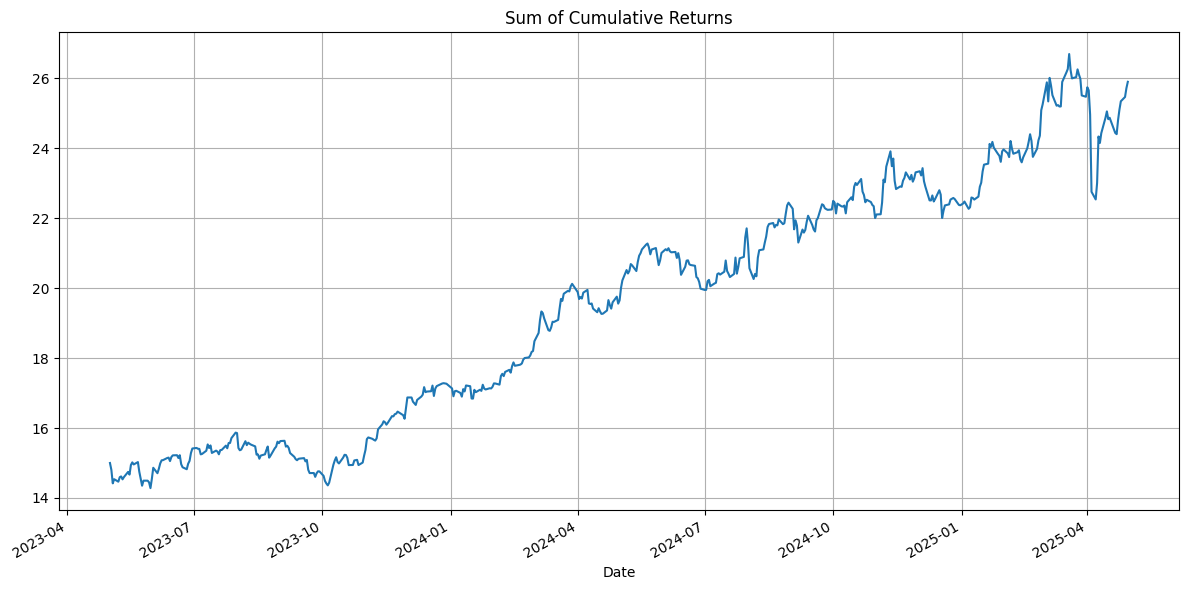

In [4]:
plot_sum_cumulative_returns(benchmark)

Dataset : fundamental zscores of basket stock

In [ ]:
dataset = build_multiticker_fundamental_dataset(TICKERS)

In [6]:
dataset

,index,period_quarter,ticker,Quarterly Return,Net Income,Gross Profit,Total Revenue,Total Debt,Total Capitalization,Free Cash Flow
0,2023-12-31,2023Q4,CAE.TO,-0.098076,0.382118,0.176486,-0.699926,-0.419512,0.064269,0.098332
1,2024-03-31,2024Q1,AIR.PA,0.344464,-0.545194,-0.729711,-0.874845,1.103595,-0.261132,-1.087135
2,2024-01-31,2024Q1,AVAV,0.052154,0.584237,-0.774531,0.076980,1.578433,-0.841574,1.584989
3,2024-03-31,2024Q1,BA,-0.259610,0.871121,0.790513,-0.447471,-1.750113,-0.985792,-0.585858
4,2024-03-31,2024Q1,CAE.TO,-0.022028,-1.961474,-0.778349,-0.084394,-1.117327,-1.559918,-0.046106
...,...,...,...,...,...,...,...,...,...,...
68,2025-03-31,2025Q1,RTX,0.150453,0.469691,0.750922,0.123873,-1.046785,-0.271218,-0.262823
69,2025-03-31,2025Q1,SPR,0.011150,-0.711202,-0.906837,-0.497511,0.959817,-1.232041,-0.526397
70,2025-03-31,2025Q1,TDG,0.091543,0.589816,1.086284,0.914236,0.845948,0.816610,-1.363639
71,2025-03-31,2025Q1,TXT,-0.055170,0.020867,-0.162089,-0.568735,1.861570,1.637683,-1.428262


### 1. Prediction of return next quarter (Q+1) with Linear Regression

In [7]:
df_linear, beta = predict_linear_quarter_returns(dataset)

Beta of the linear regression : 

In [8]:
beta

Total Capitalization    0.028436
Net Income              0.018608
Total Debt              0.006146
Gross Profit           -0.005092
Free Cash Flow         -0.021060
Total Revenue          -0.026126
dtype: float64

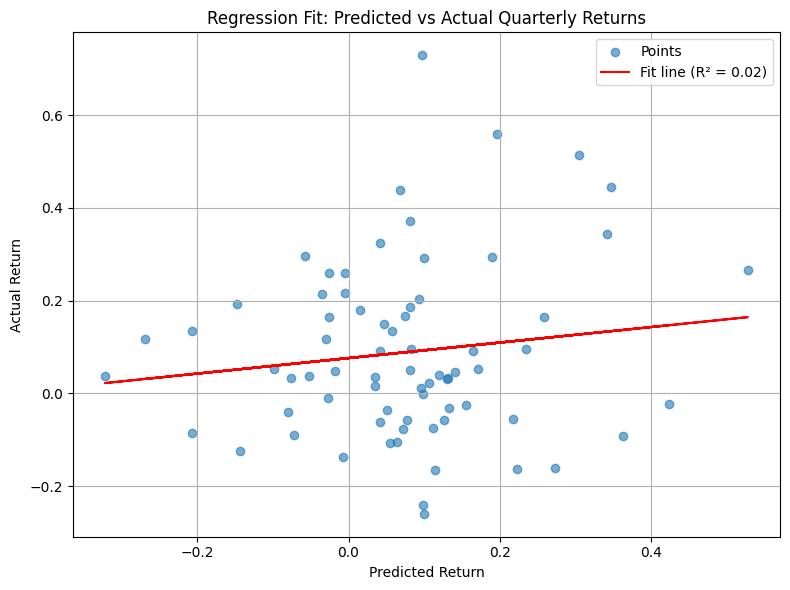

In [9]:
plot_prediction_scatter(df_linear)

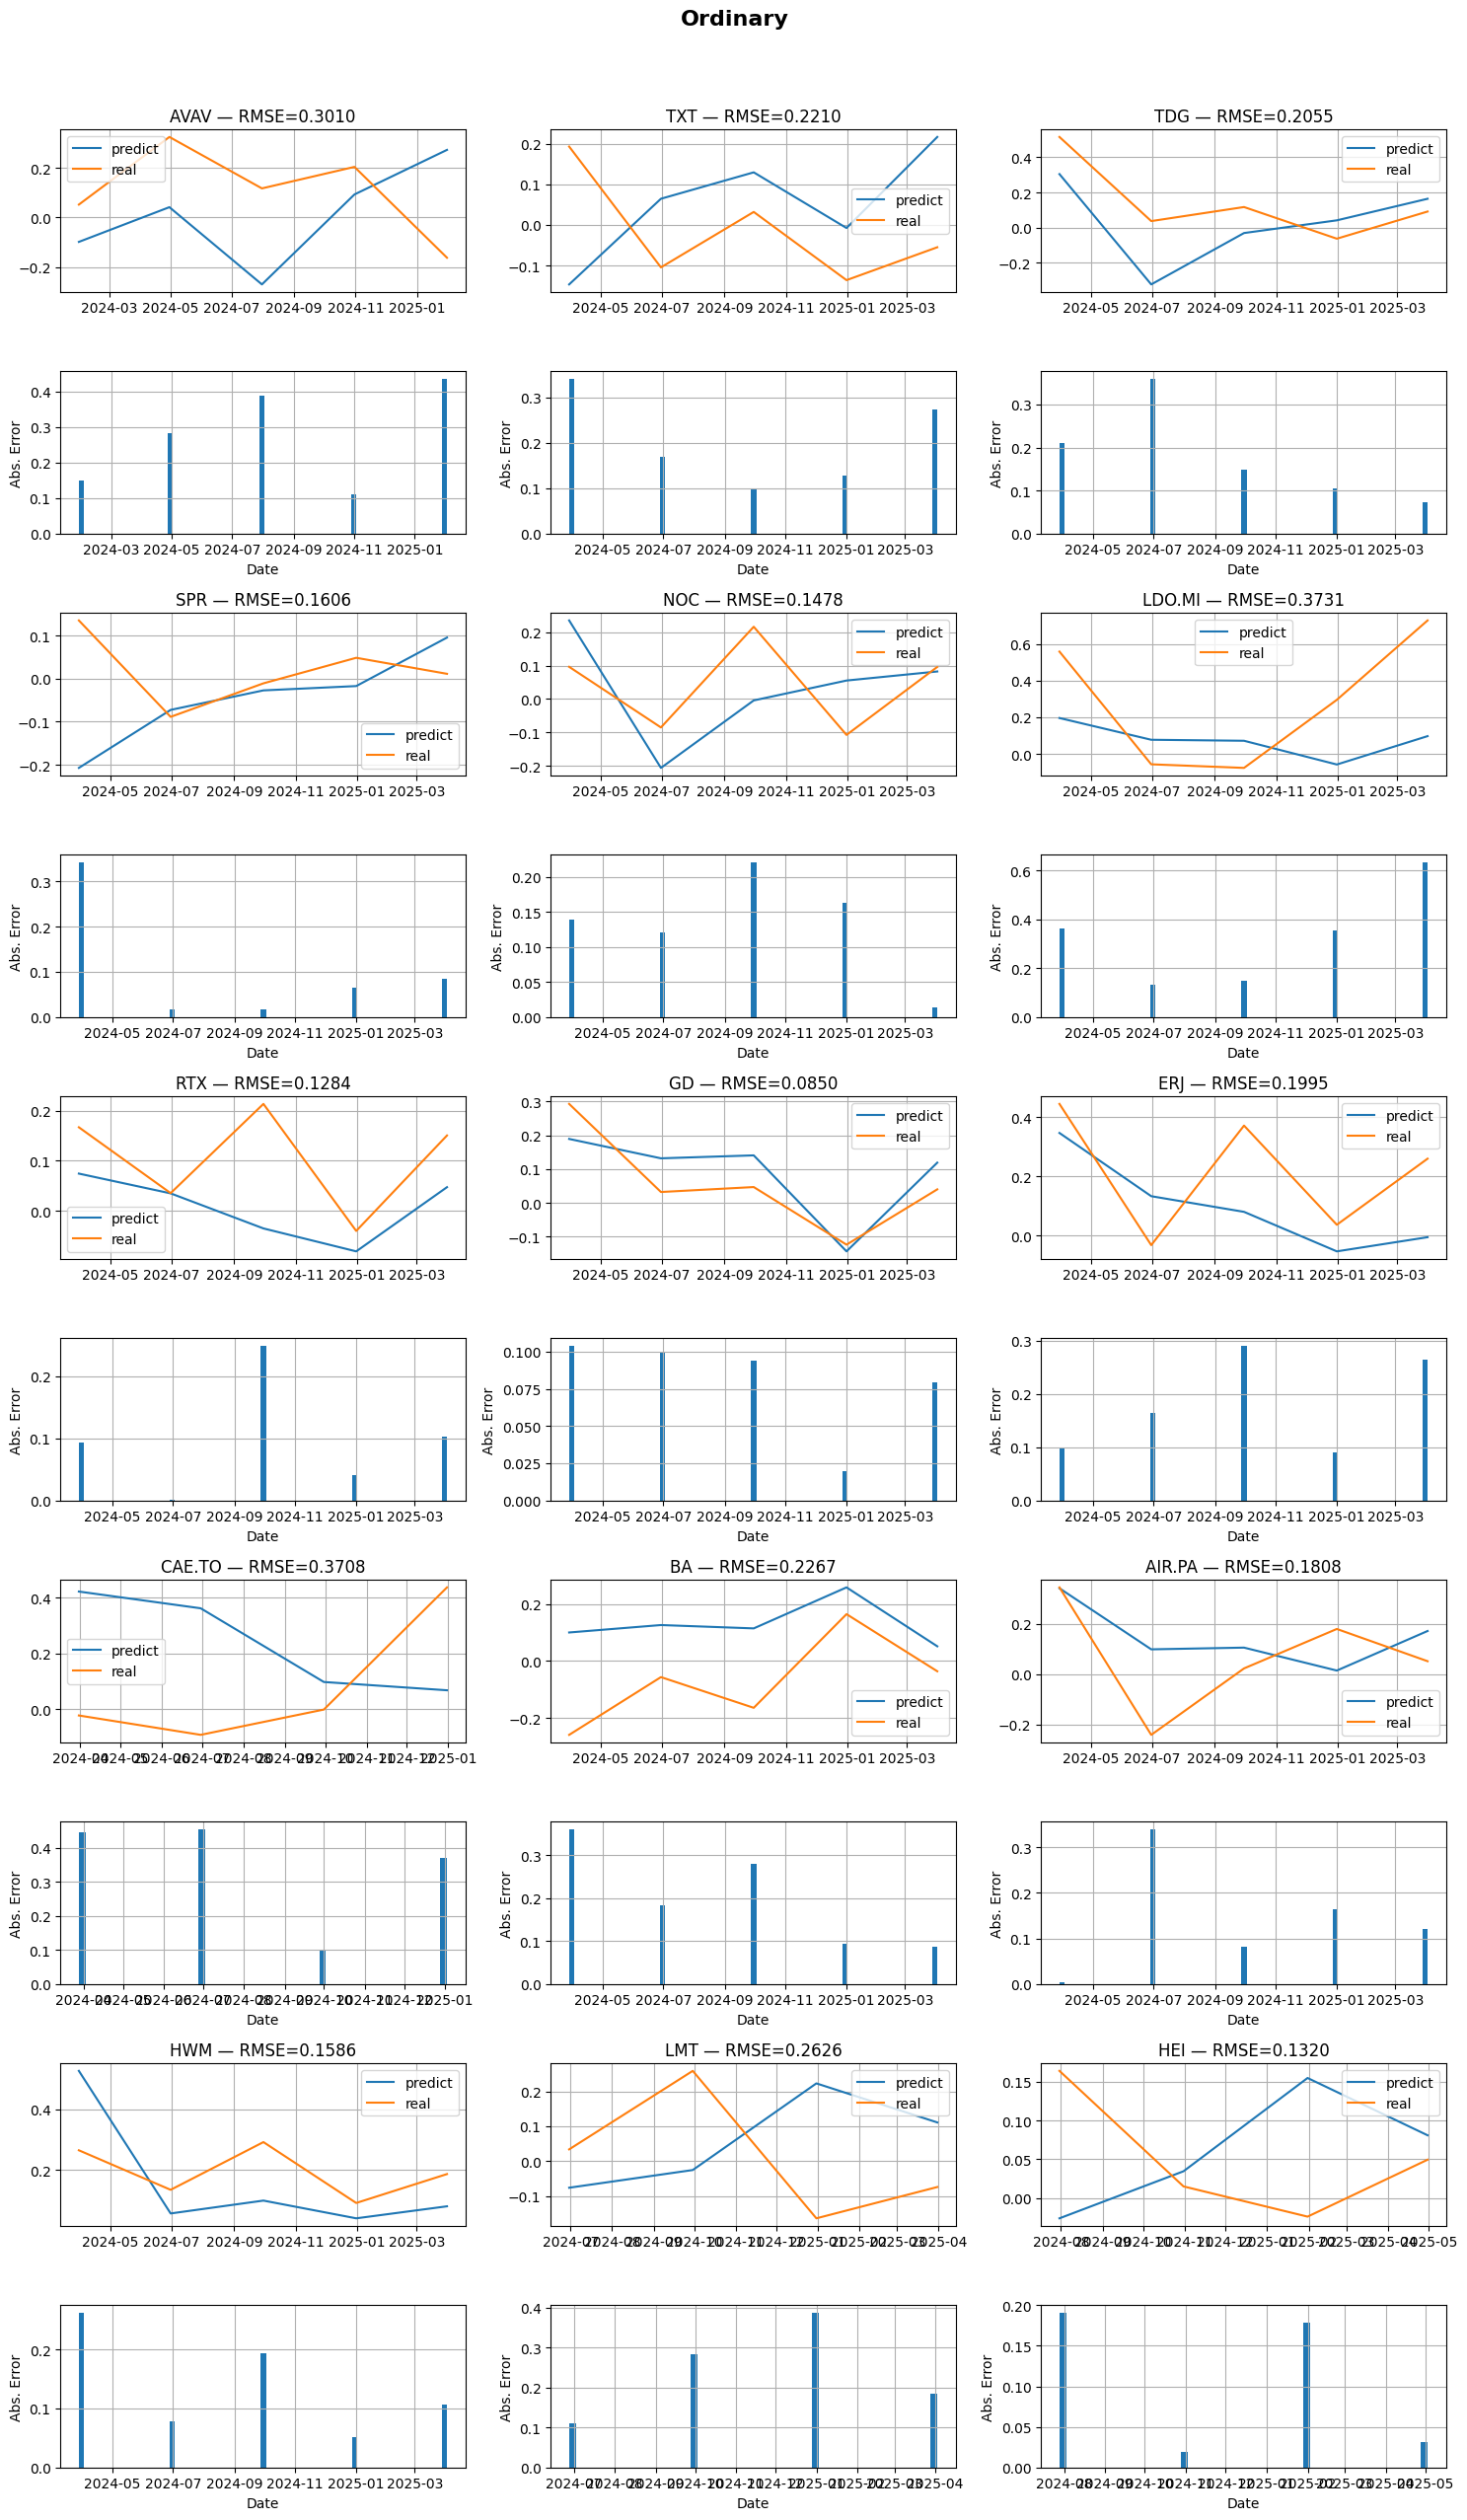

In [10]:
plot_grid_predictions_by_ticker(df_linear, "Ordinary")

### 2. Prediction of return next quarter (Q+1) with Ridge Linear Regression

In [11]:
df_ridge, betar = predict_ridge_quarter_returns(dataset)

In [12]:
betar

Total Capitalization    0.028116
Net Income              0.018270
Total Debt              0.006053
Gross Profit           -0.005078
Free Cash Flow         -0.020929
Total Revenue          -0.025700
dtype: float64

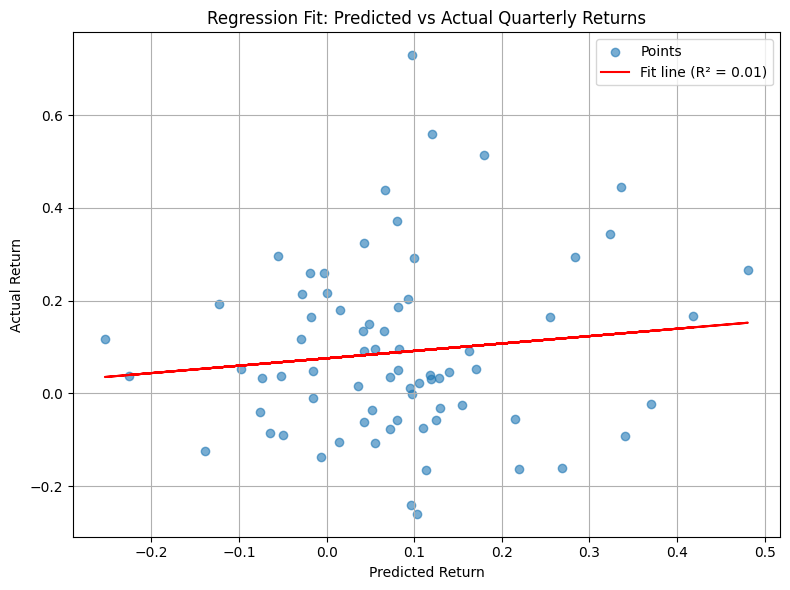

In [13]:
plot_prediction_scatter(df_ridge)

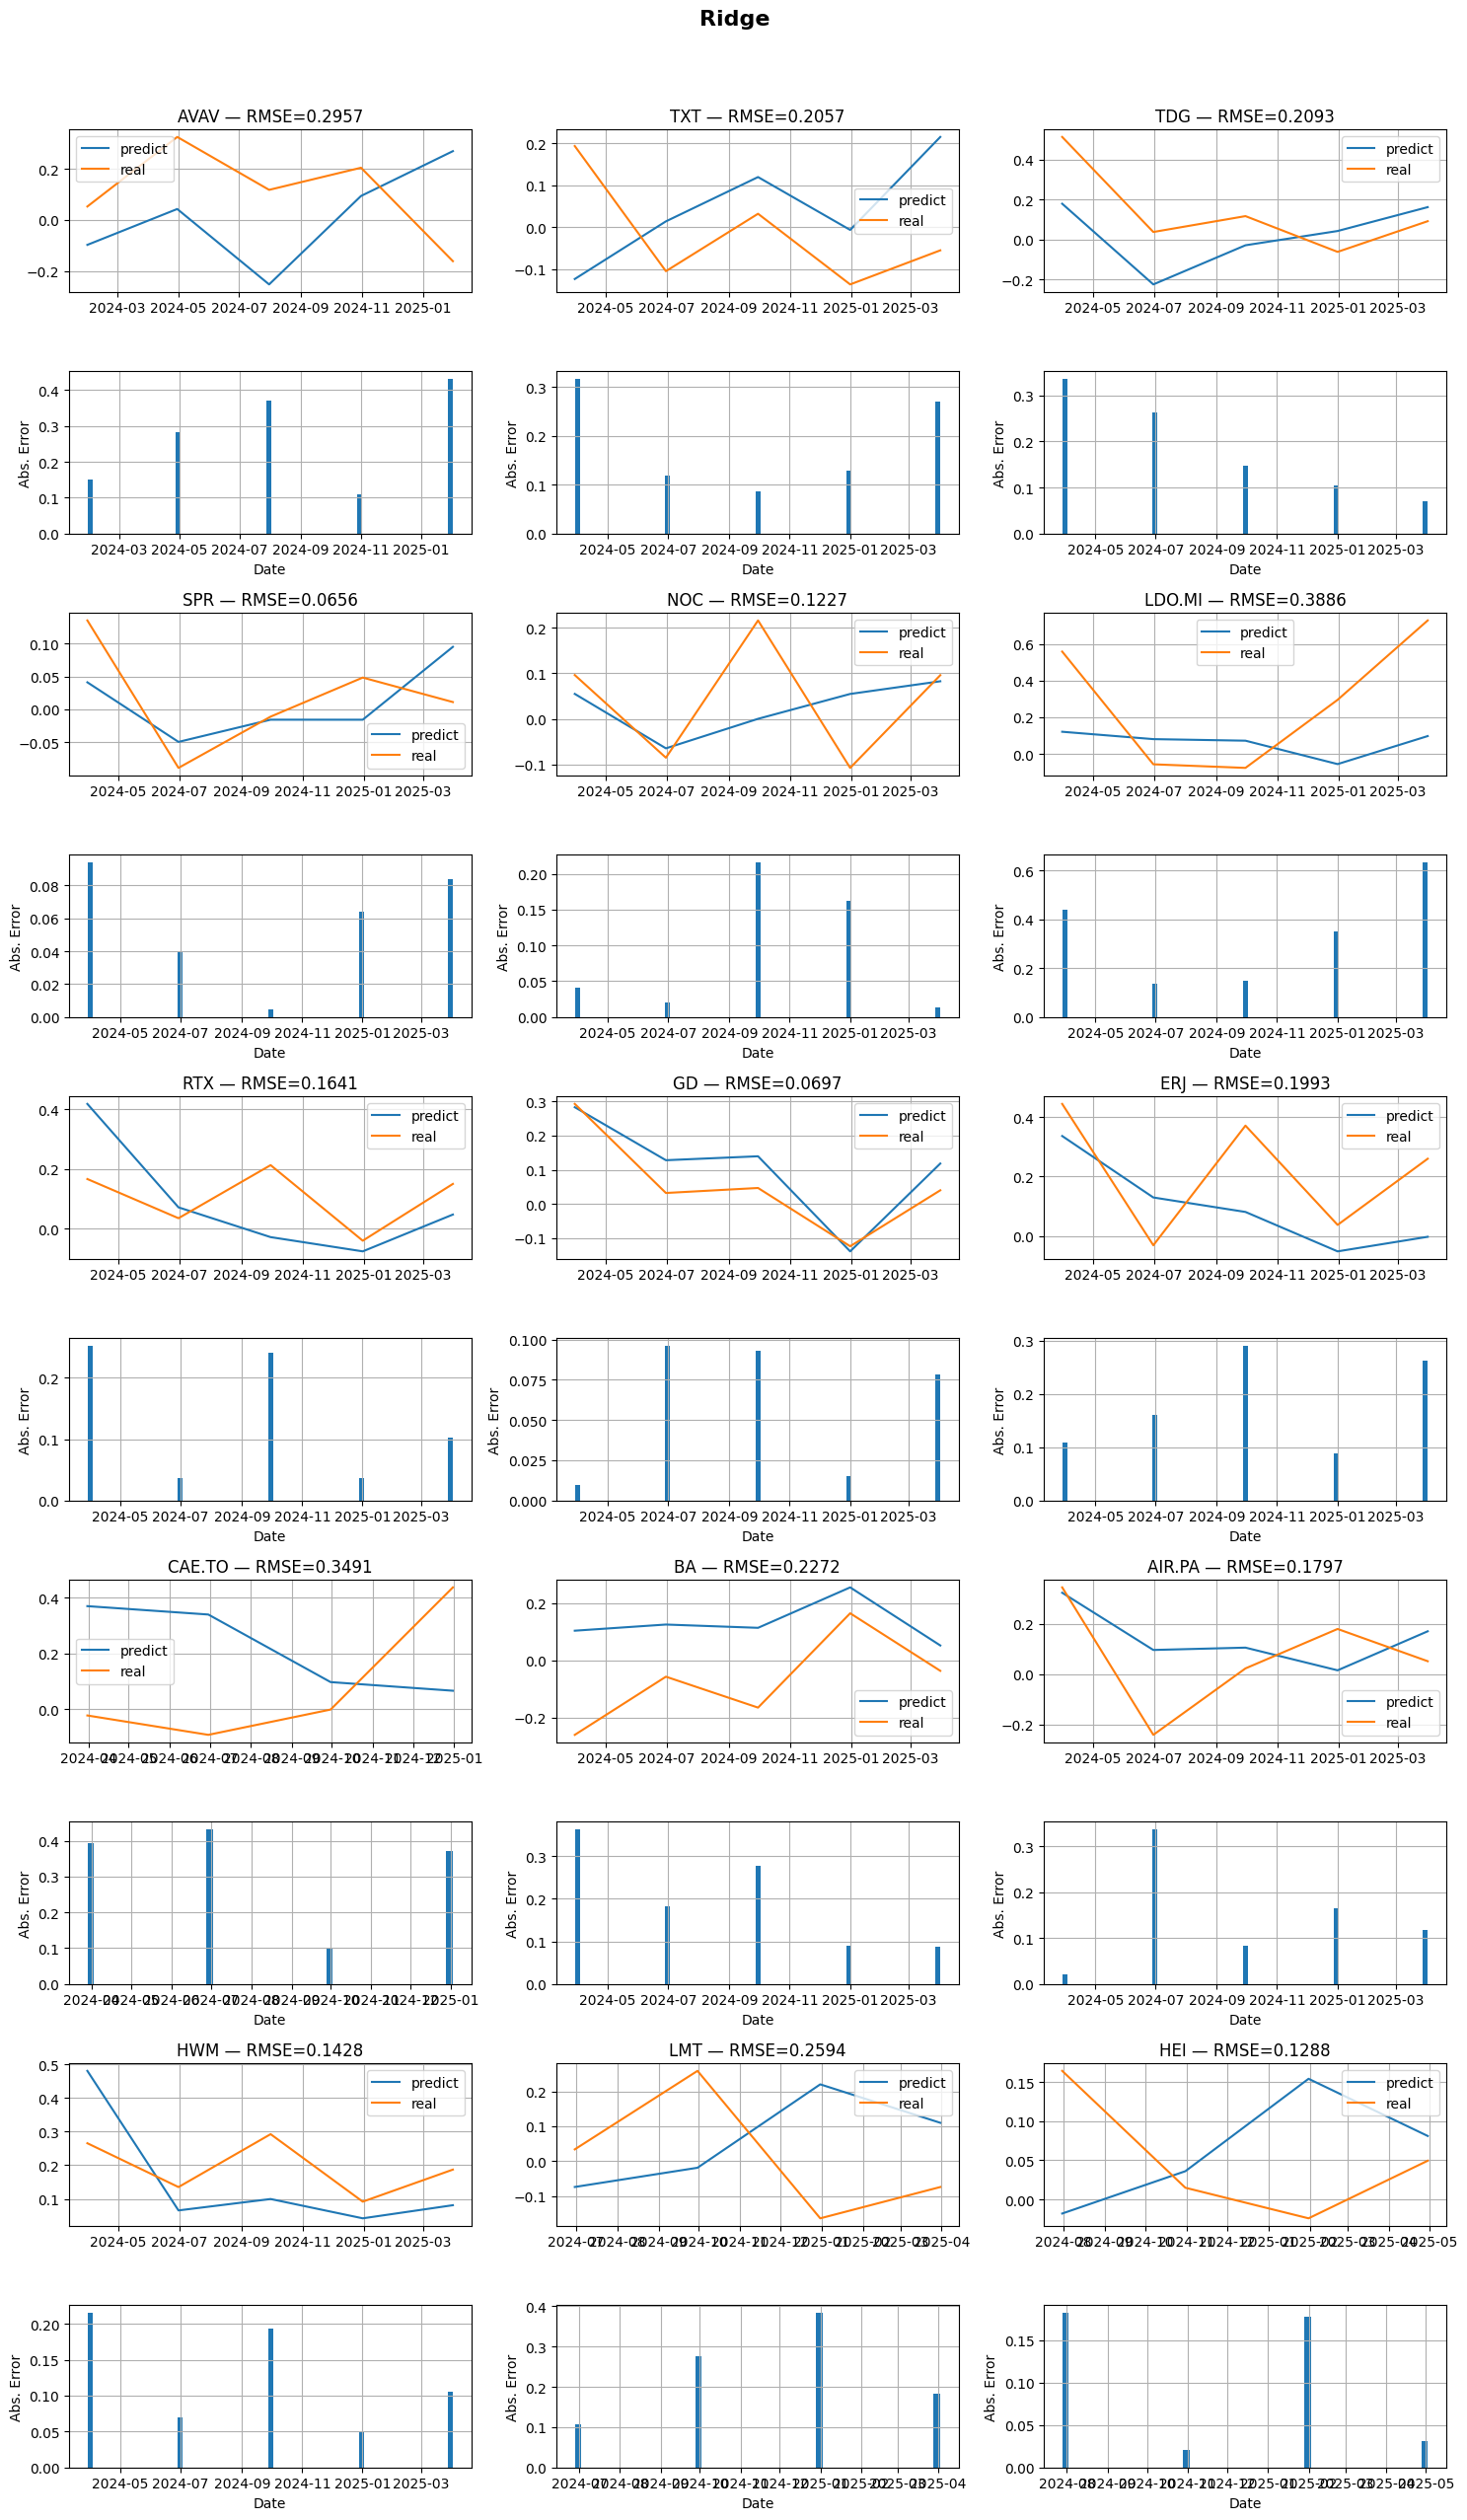

In [14]:
plot_grid_predictions_by_ticker(df_ridge, "Ridge")

### 3. Prediction of return next quarter (Q+1) with Lasso Linear Regression

In [15]:
df_lasso, betal = predict_ridge_quarter_returns(dataset)

In [16]:
betal

Total Capitalization    0.028116
Net Income              0.018270
Total Debt              0.006053
Gross Profit           -0.005078
Free Cash Flow         -0.020929
Total Revenue          -0.025700
dtype: float64

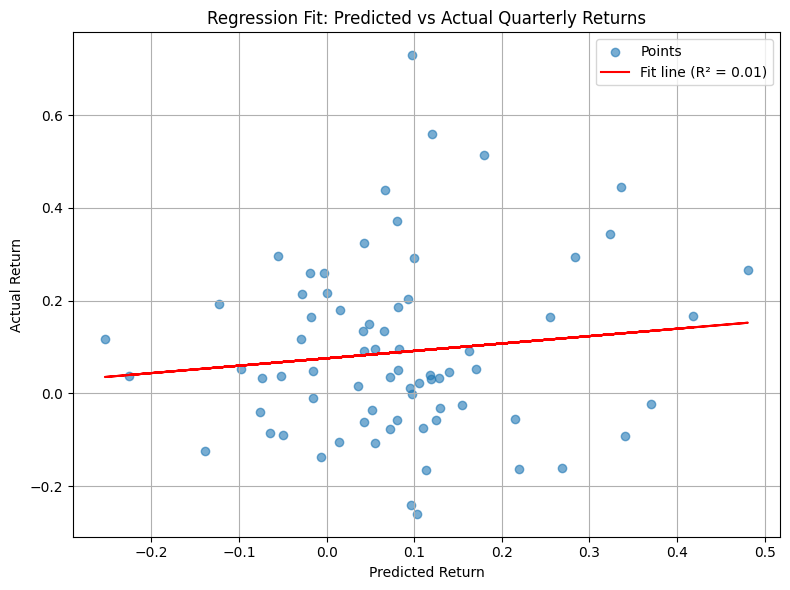

In [17]:
plot_prediction_scatter(df_lasso)

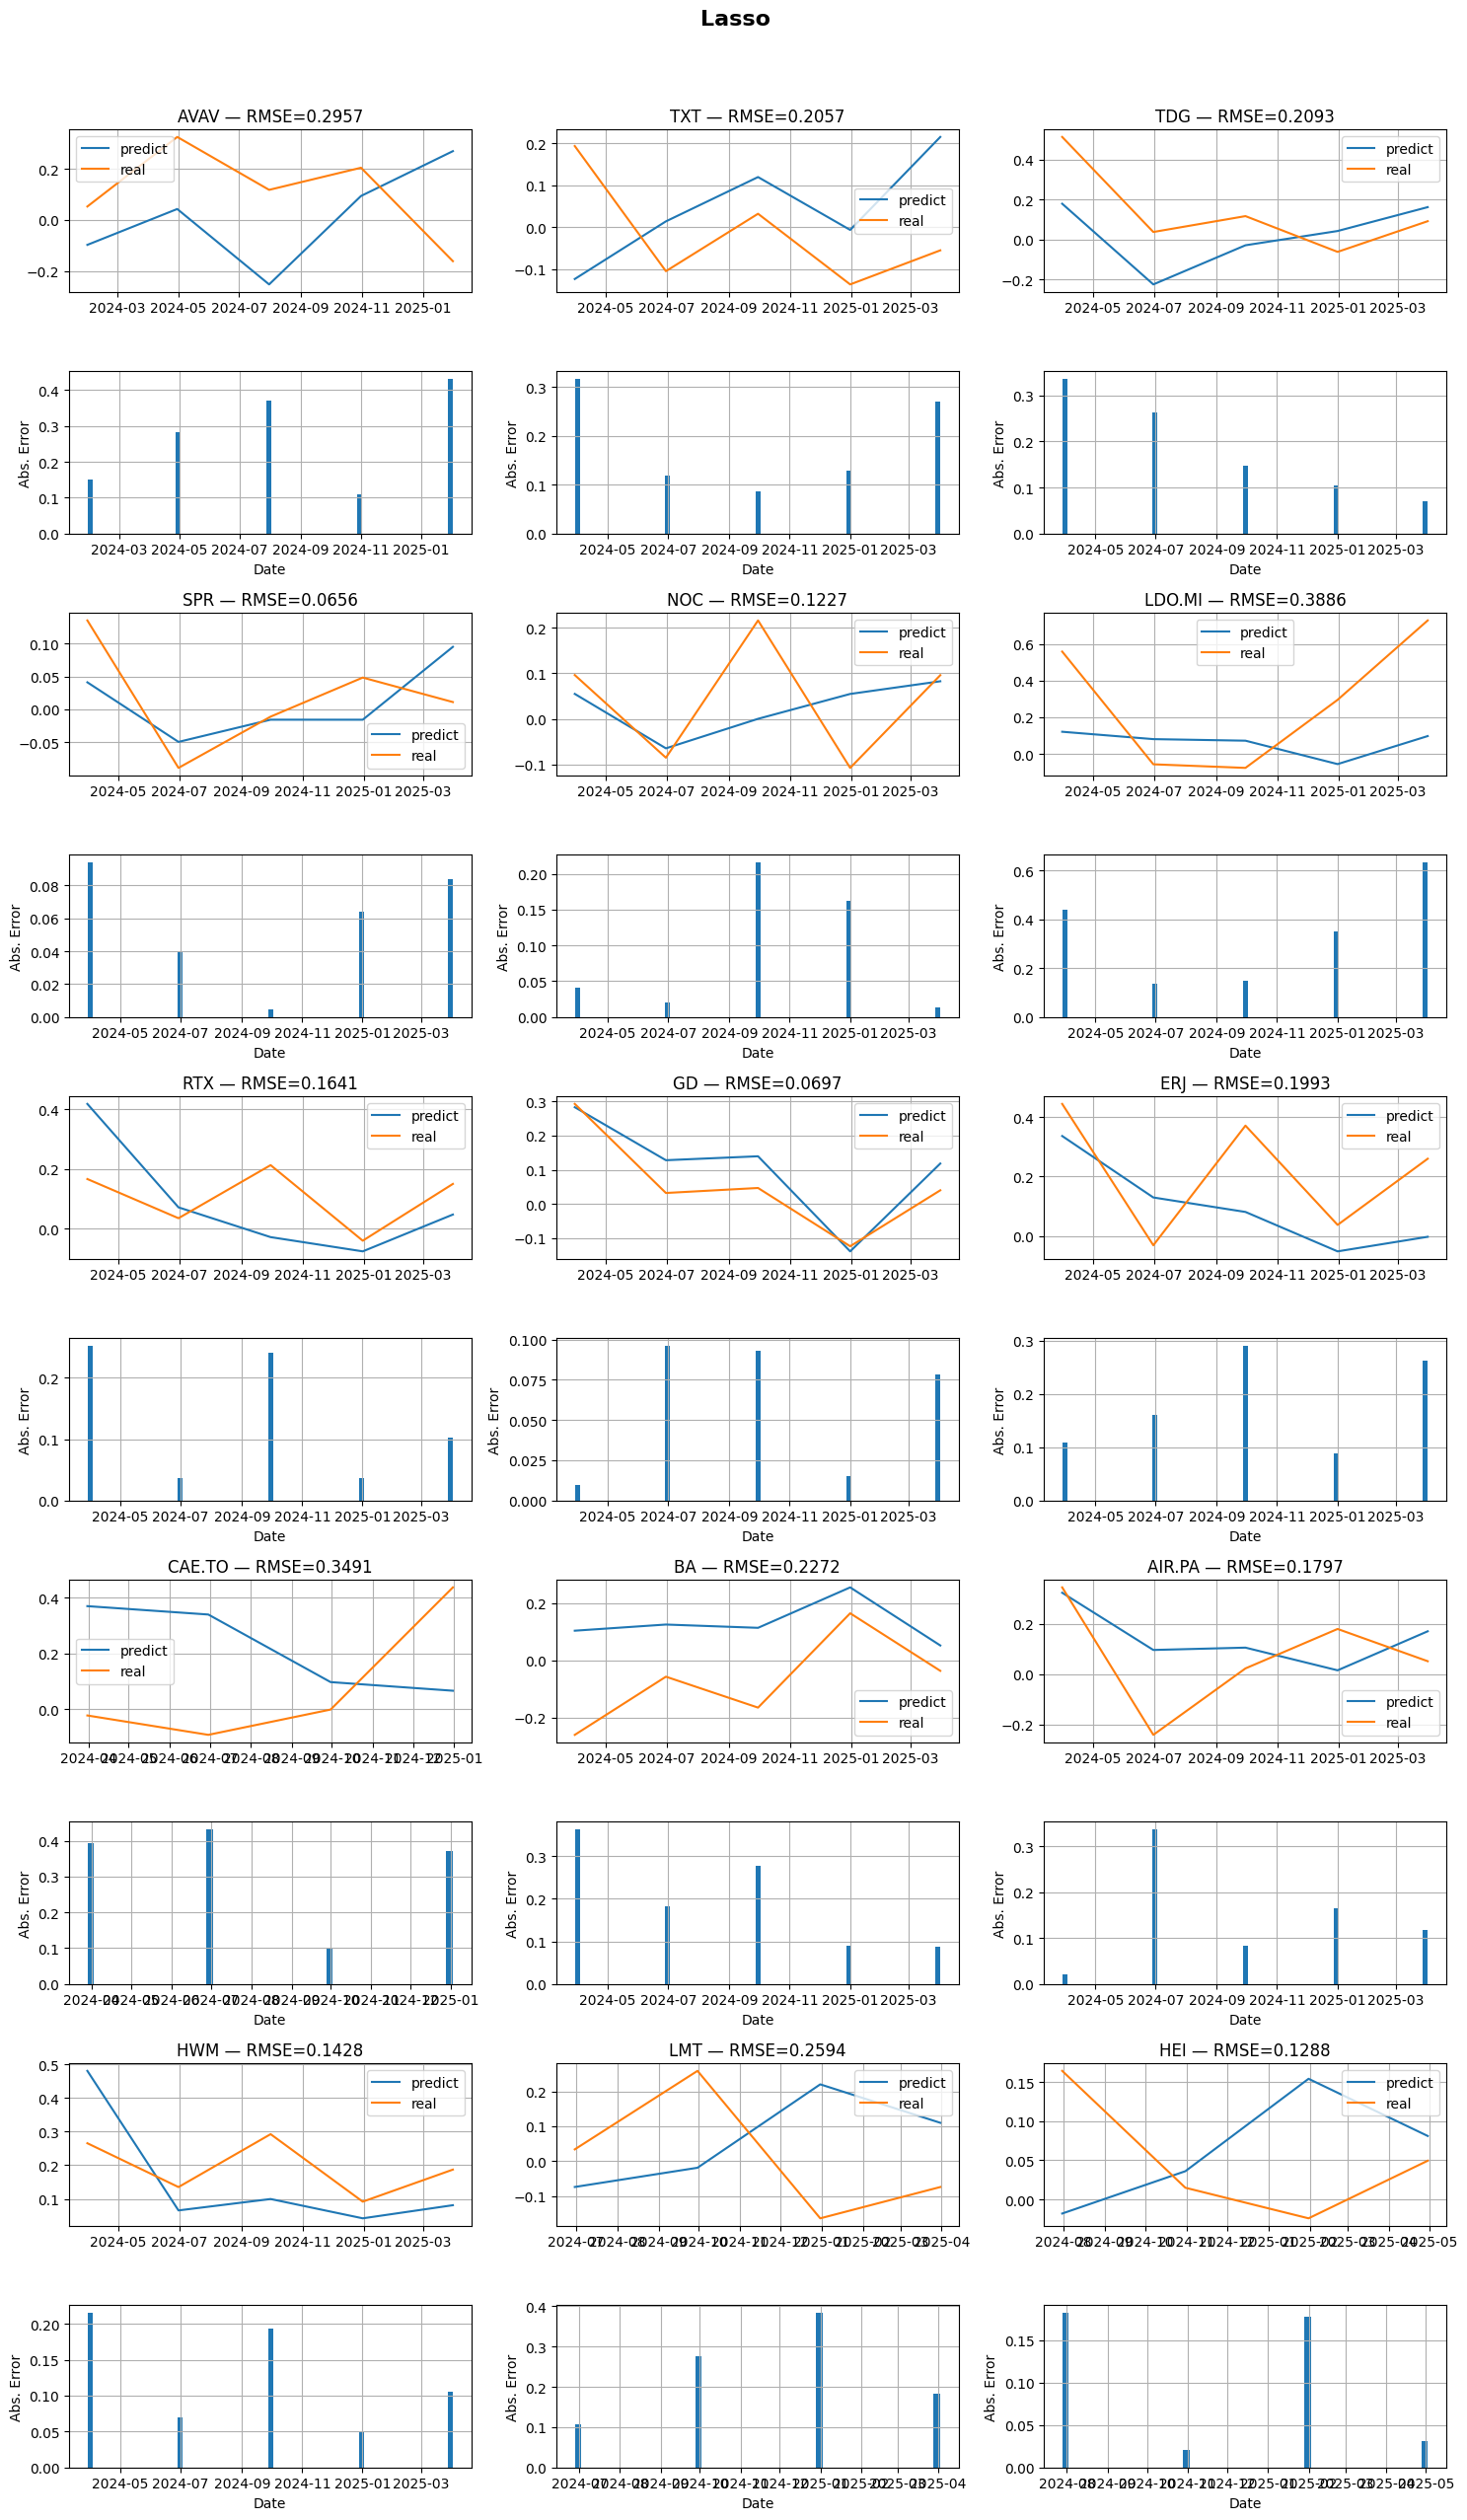

In [18]:
plot_grid_predictions_by_ticker(df_lasso, "Lasso")